<a href="https://colab.research.google.com/github/TiagoSanti/trab1-knn-chatbot/blob/master/trab1_knn_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chatbot de delivery com KNN
Disciplina: Inteligência Artificial T03 <br>
Professor: Edson Takashi Matsubara <br><br>
Aluno: Tiago Clarintino Santi <br>
RGA: 2021.1906.036-0<br>

# Carregar dataset
Formulário para coleta de dados: https://forms.gle/v531DJ2p37MmjMPG7

In [ ]:
# montando o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# carregando .csv para um dataframe pandas
df = pd.read_csv('/content/drive/MyDrive/IA/2022-1/trab1-knn-chatbot/Treinamento_de_Chatbot.csv')

In [ ]:
df

,Carimbo de data/hora,Pedir o cardápio,"Adicionar um item ao pedido (seguindo as opções: xburguer, xsalada, xbacon, batata frita, suco de laranja, coca cola, guaraná)",Pedir a conta,Forma de pagamento,Cancelar o pedido,Inserir endereço para entrega,Acompanhar status do pedido
0,2022/03/22 2:51:28 PM GMT-4,me ve o cardapio,vou querer um xbacon,qual o total?,no dinheiro,quero cancelar,"rua barao do rio branco, 772",onde o pedido ta?
1,2022/03/22 5:33:20 PM GMT-4,tem cardapio?,quero um x-bacon,quanto ficou?,pix,cancelar pedido,"avenida tal, bairro ministro, 345",o pedido ta a caminho?
2,2022/03/22 5:36:18 PM GMT-4,o que tem no menu?,x-bacon,me ve a conta,vou pagar no crédito,nao quero mais,"rua joao arinos, bairro jardim noroeste, 3457",o entregador já saiu?
3,2022/03/22 6:38:39 PM GMT-4,o que ta servindo hoje?,um guaraná 2l,quanto da?,no debito,cancela,"Rua Gonçalo de Carvalho, 21",localizacao entregador
4,2022/03/22 7:29:48 PM GMT-4,manda o cardapio,manda uma coca 2 litro,deu quanto?,passa débito?,cancela tudo,rua john doe numero 69,ta vindo ja?
...,...,...,...,...,...,...,...,...
65,2022/03/27 1:58:24 PM GMT-4,Me vê o cardápio,Vou querer uma batata frita,Pode me vê a conta,Cartão,"Não, Cancela o pedido ai",Rua antilhon ribeiro soares,Localização do pedido
66,2022/03/27 2:10:24 PM GMT-4,Cardápio?,Gostaria de um xbacon,Me ve a dolorida,Aproximação no crédito,"Obrigado, não quero mais",Rua afro puga 147,Gostaria de saber se esta chegando
67,2022/03/27 3:04:34 PM GMT-4,Me vê o cardápio aí por favor,Um X-bacon por favor,Trás a conta aí mestre,Vai ser no credito,Quero mais n obrigado,Rua aguardo Cury 728,Como está indo meu pedido?
68,2022/03/27 3:06:43 PM GMT-4,Manda o menu ai chefia,Lança um xbacon especial pra nois ai,Deu quanto essa brincadeira ai?,"Vou pagar no cash, esquece",Enchi o bucho meu rei quero mais não,"Rua Onde a Fome Habita, número 123",Aonde que tá o pacote?


In [ ]:
df.shape

(70, 8)

In [ ]:
# removendo coluna de timespan e renomeando coluna de adição de pedidos
df = df.drop(columns='Carimbo de data/hora')
df = df.rename(columns = {
    'Adicionar um item ao pedido (seguindo as opções: xburguer, xsalada, xbacon, batata frita, suco de laranja, coca cola, guaraná)': 'Adicionar um item ao pedido',
    'Forma de pagamento': 'Inserir forma de pagamento'}, inplace = False)

In [ ]:
# armazenando intenções
intentions = df.columns.to_list()
intentions

['Pedir o cardápio',
 'Adicionar um item ao pedido',
 'Pedir a conta',
 'Inserir forma de pagamento',
 'Cancelar o pedido',
 'Inserir endereço para entrega',
 'Acompanhar status do pedido']

In [ ]:
# armazenando X (dados) and Y (rótulos) globais
x = []
y = []

for intention in intentions:
  intention_values = df[intention].values.tolist()
  for intention_value in intention_values:
    x.append(intention_value)
    y.append(intention)

# Dividindo dataset em treino e teste

## Holdout

In [ ]:
import sklearn.model_selection as model_selection

In [ ]:
# dividindo X e Y globais em 71,43% para treino e 28,57% para teste e validação
xtrain, xtestval, ytrain, ytestval = model_selection.train_test_split(x, y, test_size=0.2857, shuffle=True, stratify=y, random_state=0)

In [ ]:
# dividindo X e Y de teste e validação em 50% cada
xtest, xval, ytest, yval = model_selection.train_test_split(xtestval, ytestval, test_size=0.5, shuffle=True, stratify=ytestval, random_state=0)

In [ ]:
# visualizando tamanho dos dados
print(f'X lenght: {len(x)} (Proportion: {len(x)/len(x)*100:.2f}%)\n')
print(f'Train lenght: {len(xtrain)} (Proportion: {len(xtrain)/len(x)*100:.2f}%)')
print(f'Validation lenght: {len(xval)} (Proportion: {len(xval)/len(x)*100:.2f}%)')
print(f'Test lenght: {len(xtest)} (Proportion: {len(xtest)/len(x)*100:.2f}%)')

X lenght: 490 (Proportion: 100.00%)

Train lenght: 350 (Proportion: 71.43%)
Validation lenght: 70 (Proportion: 14.29%)
Test lenght: 70 (Proportion: 14.29%)


# Indução de modelo e validação com ajuste de parâmetros

In [ ]:
!pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer
import sklearn.neighbors as neighbors
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [ ]:
# listas de parâmetros
conv_models = ['multi-qa-mpnet-base-cos-v1', 'multi-qa-mpnet-base-dot-v1']
weights = ['uniform', 'distance']
algorithms = ['ball_tree', 'kd_tree', 'brute']

best_score = 0
# testando modelos de conversão de sentenças e parâmetros de classificador
for conv_model in conv_models:
  converter = SentenceTransformer(conv_model)
  xtrain_embeddings = converter.encode(xtrain)
  xval_embeddings = converter.encode(xval)

  for k in range(1, 15):
      for weight in weights:
          for algorithm in algorithms:
            model = neighbors.KNeighborsClassifier(n_neighbors=k, algorithm=algorithm, weights=weight)
            model.fit(xtrain_embeddings, ytrain)
            val_pred = model.predict(xval_embeddings)
            score = f1_score(yval, val_pred, average = 'macro')
            report = classification_report(yval, val_pred)

            parameters = {
                    'f1_score': score,
                    'conv_model': conv_model,
                    'n_neighbors': k,
                    'algorithm': algorithm,
                    'weight': weight,
                    'classification_report': report
                }

            # visualizando parâmetros
            for param, valor in parameters.items():
              if param == 'classification_report':
                print(f'{param}:\n{valor}')
              else:
                print(f'{param}: {valor}')
            print('===========================================================')
            
            # armazenando parâmetros do melhor resultado
            if parameters['f1_score'] > best_score:
                best_score = parameters['f1_score']
                best_parameters = parameters

f1_score: 0.9856784819190835
conv_model: multi-qa-mpnet-base-cos-v1
n_neighbors: 1
algorithm: ball_tree
weight: uniform
classification_report:
                               precision    recall  f1-score   support

  Acompanhar status do pedido       1.00      1.00      1.00        10
  Adicionar um item ao pedido       1.00      1.00      1.00        10
            Cancelar o pedido       1.00      0.90      0.95        10
Inserir endereço para entrega       1.00      1.00      1.00        10
   Inserir forma de pagamento       0.91      1.00      0.95        10
                Pedir a conta       1.00      1.00      1.00        10
             Pedir o cardápio       1.00      1.00      1.00        10

                     accuracy                           0.99        70
                    macro avg       0.99      0.99      0.99        70
                 weighted avg       0.99      0.99      0.99        70

f1_score: 0.9856784819190835
conv_model: multi-qa-mpnet-base-cos-v1
n_nei

In [ ]:
# visualizando parâmetros do melhor resultado
for param, valor in best_parameters.items():
    if param == 'classification_report':
      print(f'{param}:\n{valor}')
    else:
      print(f'{param}: {valor}')

f1_score: 0.9856784819190835
conv_model: multi-qa-mpnet-base-cos-v1
n_neighbors: 1
algorithm: ball_tree
weight: uniform
classification_report:
                               precision    recall  f1-score   support

  Acompanhar status do pedido       1.00      1.00      1.00        10
  Adicionar um item ao pedido       1.00      1.00      1.00        10
            Cancelar o pedido       1.00      0.90      0.95        10
Inserir endereço para entrega       1.00      1.00      1.00        10
   Inserir forma de pagamento       0.91      1.00      0.95        10
                Pedir a conta       1.00      1.00      1.00        10
             Pedir o cardápio       1.00      1.00      1.00        10

                     accuracy                           0.99        70
                    macro avg       0.99      0.99      0.99        70
                 weighted avg       0.99      0.99      0.99        70



In [ ]:
# instanciando conversor com os parâmetros do melhor resultado encontrado
converter = SentenceTransformer(best_parameters['conv_model'])
xtrain_embeddings = converter.encode(xtrain)
xval_embeddings = converter.encode(xval)

# instanciando classificador com os parâmetros do melhor resultado encontrado
model = neighbors.KNeighborsClassifier(n_neighbors=best_parameters['n_neighbors'], algorithm=best_parameters['algorithm'], weights=best_parameters['weight'])
model.fit(xtrain_embeddings, ytrain)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

In [ ]:
# Função de plot de matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cf(y, pred, title):
  cf_matrix = confusion_matrix(y, pred)
  ax = sns.heatmap(cf_matrix, annot=True)
  ax.set_title(title)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n')
  sns.set(font_scale=1.5, rc={'figure.figsize':(6,6)})

'Labels: 0 = Acompanhar \\ 1 = Adicionar \\ 2 = Cancelar \\ 3 = Pagamento \\ 4 = Endereço \\ 5 = Conta \\ 6 = Cardápio'

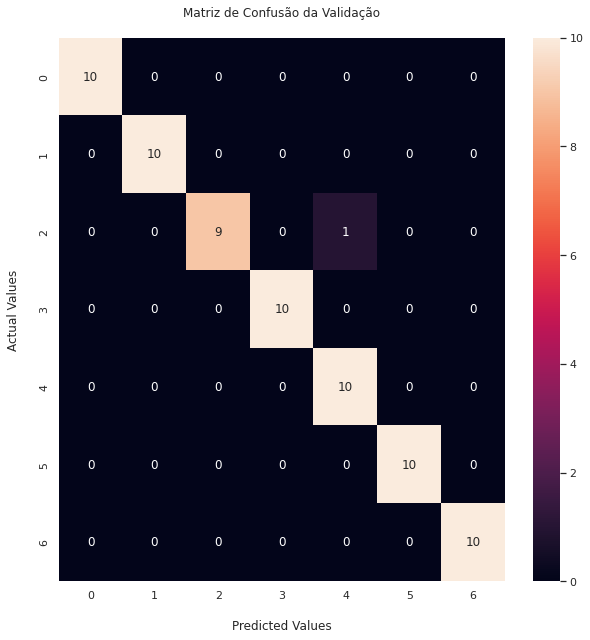

In [ ]:
# Classificação final do conjunto de validação e visualização da sua matriz de confusão
val_pred = model.predict(xval_embeddings)

plot_cf(yval, val_pred, 'Matriz de Confusão da Validação\n')

'''Labels: 0 = Acompanhar \ 1 = Adicionar \ 2 = Cancelar \ 3 = Pagamento \ 4 = Endereço \ 5 = Conta \ 6 = Cardápio'''

In [ ]:
# visualizando classificações incorretas
for i, j, k in zip(xval, yval, val_pred):
  if j != k:
    print(f'\"{i}\" - actual: {j} | pred: {k}')

"Vou embora" - actual: Cancelar o pedido | pred: Inserir forma de pagamento


# Teste do modelo

In [ ]:
# testando modelo e visualizando as métricas de classificação
xtest_embeddings = converter.encode(xtest)
test_pred = model.predict(xtest_embeddings)
print(classification_report(ytest, test_pred))

                               precision    recall  f1-score   support

  Acompanhar status do pedido       0.91      1.00      0.95        10
  Adicionar um item ao pedido       1.00      0.90      0.95        10
            Cancelar o pedido       1.00      1.00      1.00        10
Inserir endereço para entrega       1.00      1.00      1.00        10
   Inserir forma de pagamento       0.83      1.00      0.91        10
                Pedir a conta       0.90      0.90      0.90        10
             Pedir o cardápio       1.00      0.80      0.89        10

                     accuracy                           0.94        70
                    macro avg       0.95      0.94      0.94        70
                 weighted avg       0.95      0.94      0.94        70



In [ ]:
# visualizando classificações incorretas
for i, j, k in zip(xtest, ytest, test_pred):
  if j != k:
    print(f'\"{i}\" | actual: {j} | pred: {k}')

"Por favor! Gostaria de ver o menu de Vcs" | actual: Pedir o cardápio | pred: Inserir forma de pagamento
"o que ta servindo hoje?" | actual: Pedir o cardápio | pred: Inserir forma de pagamento
"quanto que fica o pedido?" | actual: Pedir a conta | pred: Acompanhar status do pedido
"Opa meu chefe / chefia / rei / patrão, me ve um xbacon por favor" | actual: Adicionar um item ao pedido | pred: Pedir a conta


'Labels: 0 = Acompanhar \\ 1 = Adicionar \\ 2 = Cancelar \\ 3 = Pagamento \\ 4 = Endereço \\ 5 = Conta \\ 6 = Cardápio'

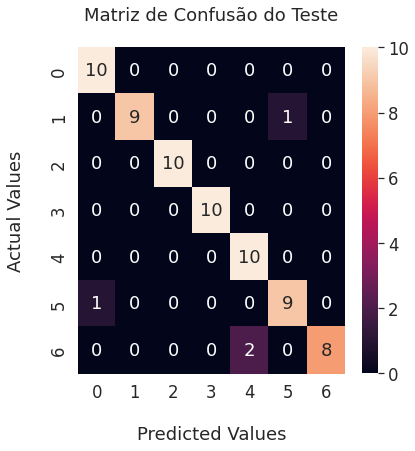

In [ ]:
# visualizando matriz de confusão do teste
plot_cf(ytest, test_pred, 'Matriz de Confusão do Teste\n')

'''Labels: 0 = Acompanhar \ 1 = Adicionar \ 2 = Cancelar \ 3 = Pagamento \ 4 = Endereço \ 5 = Conta \ 6 = Cardápio'''

# Modelo final

In [ ]:
# usando o X global para ajustar modelo final
x_embeddings = converter.encode(x)
model.fit(x_embeddings, y)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

In [ ]:
from joblib import dump

# salvando modelo
dump(model, 'assistant.joblib')

['assistant.joblib']

# Visualização dos embeddings no espaço bidimensional para melhor compreenção dos dados


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
df = pd.DataFrame(x_embeddings)
df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.042302,-0.080740,-0.019424,0.002295,0.039779,0.015973,-0.057270,0.029143,0.011861,0.044707,...,0.003281,-0.015734,-0.005248,0.010737,-0.032328,0.042499,-0.020214,-0.016232,0.011587,0.010797
1,-0.042668,-0.126683,-0.021552,0.036235,0.023246,0.016179,-0.023684,0.038495,-0.036183,0.074047,...,-0.000080,-0.015019,-0.023161,0.009874,-0.017782,0.054402,-0.015491,0.006192,-0.026695,0.013210
2,0.019927,-0.047831,-0.027565,0.030975,0.006682,0.013319,-0.051742,0.031507,0.077401,0.011428,...,-0.026419,0.001530,-0.018310,-0.019967,0.001617,-0.035537,-0.024933,0.019251,-0.055526,0.021330
3,0.040900,0.030878,0.011447,-0.034984,0.008294,-0.043747,-0.041313,-0.007684,0.030295,0.032690,...,-0.027183,0.014107,-0.018084,0.002141,-0.008370,0.032121,-0.036008,-0.009928,-0.040499,0.025190
4,-0.037413,-0.017442,-0.021262,0.034716,0.056038,-0.001293,-0.024708,0.026631,-0.033145,0.043572,...,0.013186,0.001140,-0.071851,0.009855,-0.052465,0.010703,-0.024173,-0.010468,0.015885,0.031970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,-0.046648,0.043795,-0.025076,0.015091,0.018485,-0.032823,-0.004057,0.027164,-0.041706,0.065992,...,-0.000211,-0.002578,-0.081145,0.000628,-0.026250,-0.057388,-0.007896,0.033725,0.003932,0.027421
486,0.011080,-0.027462,0.007213,-0.017313,0.019651,-0.000857,-0.050553,0.014394,-0.043853,0.029809,...,0.031587,0.002605,-0.055637,-0.004148,0.000073,0.015293,-0.028195,0.017668,-0.043824,-0.026509
487,-0.055586,0.032199,-0.017201,0.006043,0.017732,-0.000057,-0.026420,0.020519,0.007702,0.049894,...,-0.024984,-0.009860,-0.020364,0.033312,-0.033898,-0.021068,-0.038534,0.016233,-0.005862,0.022425
488,-0.017692,-0.018859,-0.004791,0.009049,0.043462,-0.042503,-0.058222,0.018511,0.003267,0.016319,...,-0.081677,0.001001,-0.077756,0.002482,0.014863,0.122654,-0.011431,0.007122,0.008244,0.059856


In [ ]:
# definindo dimensão(n_components) desejada dos embeddings e ajustando tsne para o dataframe 
tsne = TSNE(n_components=2, random_state=0)
df_tsne = pd.DataFrame(tsne.fit_transform(df))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
# adicionando classe dos embeddings e nomeando colunas
df_tsne['Intenções'] = y
df_tsne.columns = ['X', 'Y', 'Intenções']
df_tsne

,X,Y,Intenções
0,11.037262,-26.261068,Pedir o cardápio
1,8.957090,-29.281315,Pedir o cardápio
2,4.010172,-6.156734,Pedir o cardápio
3,-12.393595,3.991080,Pedir o cardápio
4,13.989520,-25.933994,Pedir o cardápio
...,...,...,...
485,-20.485832,3.962318,Acompanhar status do pedido
486,-20.941742,-5.153513,Acompanhar status do pedido
487,-16.919086,0.753790,Acompanhar status do pedido
488,-2.755344,-18.628151,Acompanhar status do pedido


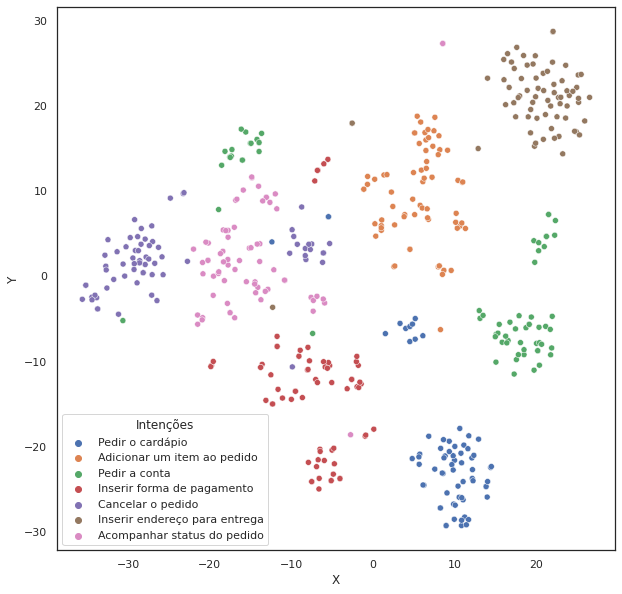

In [ ]:
# visualização bidimensional dos embeddings
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('white')
sns.scatterplot(x=df_tsne['X'], y=df_tsne['Y'], hue=df_tsne['Intenções'])

# Chatbot

In [ ]:
!pip install unidecode

In [ ]:
import time
import random
from joblib import load
from nltk.tokenize import TweetTokenizer
from unidecode import unidecode
from tqdm import notebook as tqdm
tknzr = TweetTokenizer()

In [ ]:
# definindo intenções Acompanhar, Adicionar, Cancelar, Pagamento, Endereço, Conta, Cardápio
intentions = {
    'CARDAPIO': 'Pedir o cardápio',
    'ITEM': 'Adicionar um item ao pedido',
    'CONTA': 'Pedir a conta',
    'ENDERECO': 'Inserir endereço para entrega',
    'PAGAMENTO': 'Inserir forma de pagamento',
    'STATUS': 'Acompanhar status do pedido',
    'CANCELAR': 'Cancelar o pedido',
}

# definindo itens do cardápio e algumas possíveis variações
items_variation = {
    'xburguer': ['xburguers', 'xburgers'],
    'xbacon': ['xbacons'],
    'xsalada': ['xsaladas'],
    'batata frita': ['batatas', 'fritas'],

    'suco laranja': ['sucos', 'laranjas'],
    'coca cola': ['cocas', 'coquinhas'],
    'guarana': ['guaranas']
}

# definindo alguns valores numéricos
values = {'um': 1, 'uma': 1,
             'dois': 2, 'duas': 2,
             'tres': 3, 'quatro': 4,
             'cinco': 5, 'seis': 6,
             'sete': 7, 'oito': 8,
             'nove': 9, 'dez': 10}

# definindo cardápio
menu = {
    'xburguer': 12.50,
    'xbacon': 14.00,
    'xsalada': 15.00,
    'batata frita': 9.00,

    'suco laranja': 7.00,
    'coca cola': 6.00,
    'guarana': 8.00
}

# definindo métodos de pagamento
payment_methods = ['pix',
                   'credito',
                   'debito',
                   'dinheiro',
                   'cartao']

# definindo status para o pedido
CANCELLED = 0
ORDERING = 1
COOKING = 2
DELIVERING = 3
DELIVERED = 4

In [ ]:
# função que retorna uma lista de itens encontrados na sentença de entrada do usuário
def find_item_entities(user_input):
  entities_found = []
  tokens = tknzr.tokenize(user_input)

  for token in tokens:
      if not token.isnumeric() and len(token) > 1:
        token = token.lower()
        token = unidecode(token)

        if token in values.keys():
          entities_found.append(values[token])
        else:
          for key in items_variation:
            item_list = [key]+items_variation[key]
            for item in item_list:
              if token in item:
                if key == 'batata frita':
                  if 'frita' in tokens: tokens.remove('frita')
                  if 'fritas' in tokens: tokens.remove('fritas')
                if key == 'suco laranja':
                  if 'laranja' in tokens: tokens.remove('laranja')
                entities_found.append(token)
                break

      elif token.isnumeric():
        entities_found.append(token)
          
  return entities_found

# função que retorna uma lista de entidades relacionadas ao método de pagamento
# encontradas na sentença de entrada do usuário
def find_payment_method_entitites(user_input):
  entities_found = []
  tokens = tknzr.tokenize(user_input)

  for token in tokens:
      if not token.isnumeric() and len(token) > 1:
        token = token.lower()
        token = unidecode(token)

        if token in payment_methods:
          entities_found.append(token)

  return entities_found

# função que retorna o item do cardápio identificado na sentença de entrada do usuário
def get_key(item):
    for key in items_variation:
      item_list = [key]+items_variation[key]
      for item_ in item_list:
        if item in item_:
          return key

In [ ]:
# classe que manipula o pedido de modo geral
class Order:
  def __init__(self):
    self.items = {
        'xburguer': 0,
        'xbacon': 0,
        'xsalada': 0,
        'batata frita': 0,

        'suco laranja': 0,
        'coca cola': 0,
        'guarana': 0
    }
    self.payment_method = ''
    self.address = ''
    self.status = ORDERING
    self.eta = None
  
  # atribui a entrada do usuário ao método de pagamento
  def add_payment_method(self, user_input):
    entities_found = find_payment_method_entitites(user_input) 
    if 0 < len(entities_found) < 3:
      self.payment_method = ' '.join(entities_found)
    else:
      print('Verifique se inseriu corretamente o método de pagamento.')

  # atribui a entrada do usuário ao endereço de entrega
  def set_address(self, user_input):
    self.address = user_input

  # calcula e retorna o valor total do pedido
  def get_total(self):
    total = 0
    delivery_tax = 5
    for item, quantity in zip(self.items.keys(), self.items.values()):
      total += quantity * menu[item]
    return total + delivery_tax

  # calcula pseudo-aleatoriamente o tempo de preparação do pedido
  # (entre 40 e 60 segundos)
  def start_order(self):
    self.status = COOKING
    self.eta = random.randint(40, 60)
    print('\nSeu pedido foi enviado para a cozinha!\n'
          f'Tempo estimado para conclusão: {self.eta} segundos.\n'
           'Estarei te atualizando sobre o status do seu pedido.')

  # calcula pseudo-aleatoriamente o tempo de entrega do pedido
  # (entre 40 e 60 segundos)
  def start_delivery(self):
    self.status = DELIVERING
    self.eta = random.randint(10, 20)
    print(f'Seu pedido saiu para entrega!\n'
           'Tempo estimado para conclusão: {self.eta} segundos.\n'
           'Estarei te atualizando sobre o status do seu pedido.')

  # imprime uma mensagem relativa ao status do pedido
  def get_status(self):
    status = self.status
    if status == ORDERING:
      print('Ainda não terminamos de anotar seu pedido.')
    elif status == COOKING:
      print('Seu pedido está sendo preparado pelo restaurante.')
    elif status == DELIVERING:
      print('Seu pedido está a caminho!')
    elif status == DELIVERED:
      print('Seu pedido foi entregue. Obrigado pela preferência!')

  # verifica se todos campos de entrada do pedido estão preenchidos
  def check_info(self):
    return self.payment_method != '' and self.address != '' and self.get_total() > 5

  # imprime os itens e suas respectivas quantidades existentes no pedido
  def show_items(self):
    for item, quantity in zip(self.items.keys(), self.items.values()):
      if quantity > 0:
        print(f'Item: {item}, quantidade: {quantity}')
    print()

  # adiciona os itens e suas respectivas quantidades ao dicionário de itens pedidos
  def add_to_order_dict(self, entities):
    i = 0
    while i < len(entities):
        if isinstance(entities[i], int) or entities[i].isnumeric():
          try:
            item = entities[i+1]
            quantity = int(entities[i])
            key = get_key(item)
            if key in self.items.keys():
              self.items[key] = quantity
              i += 2
            else:
              i += 1
          except IndexError:
            print('Item não encontrado. Verifique se digitou corretamente.')
            i = len(entities)
            break
        else:
          item = entities[i]
          key = get_key(item)
          self.items[key] += 1
          i += 1

  # encontra itens da sentença de entrada e os adiciona no dicionário de pedidos
  def add_items(self, user_input):
    entities_found = find_item_entities(user_input) 
    if len(entities_found) > 0:
      self.add_to_order_dict(entities_found)
    else:
      print('Nenhum item foi reconhecido')

  # reinicia instância de pedido
  def reset_order(self):
    self.__init__()

In [ ]:
# classe que armazena o modelo, classifica a entrada do usuário e mostra o cardápio
class Chatbot:
  def __init__(self):
    self.model = load('assistant.joblib')
    print('Bem-vindo ao restaurante do Tiago! Como posso ajudar? ', end='')

  # função que retorna a intenção dada uma sentença de entrada
  def get_intention(self, user_input):
    return self.model.predict([converter.encode(user_input)])[0]

  # função que imprime o cardápio
  def show_menu(self):
    print('\nEste é o nosso cardápio:')
    for key, value in zip(menu.keys(), menu.values()):
      print(f'- {key} ___ R${value:.2f}')
    print()

In [ ]:
def main():
  # instanciando classes
  chatbot = Chatbot()
  order = Order()
  
  # entrada do usuário
  user_input = input()

  # enquanto o pedido está anotado e não foi cancelado
  while order.status == ORDERING and order.status != CANCELLED:
    # classificando a entrada do usuário
    user_intention = chatbot.get_intention(user_input)

    # confirmar intenção de cancelar pedido
    if user_intention == intentions['CANCELAR']:
      print('Tem certeza que deseja cancelar?', end='')
      cancel = input('(Sim/Não): ')
      cancel = unidecode(cancel.lower())
      if cancel == 'sim':
        order.reset_order()
        print(f'Pedido cancelado. Volte sempre!')
        order.status = CANCELLED
      elif cancel == 'nao':
        print(f'O que mais deseja fazer?', end='')

    else:
      # se a intenção for pedir cardápio, imprime o cardápio
      if user_intention == intentions['CARDAPIO']:
        chatbot.show_menu()

      # se a intenção for adicionar um item, verifica a entrada para identificar
      # os itens e as respectivas quantidades e os armazena na instância do pedido
      elif user_intention == intentions['ITEM']:
        order.add_items(user_input)
        if len(order.items.keys()) > 0:
          print('\nEstes são os itens adicionados ao seu pedido até agora: ')
          order.show_items()

      # se a intenção for pedir a conta, calcula o valor total e o imprime
      elif user_intention == intentions['CONTA']:
        total = order.get_total()
        print(f'\nEste é o valor total: R${total:.2f}, incluindo a taxa de entrega fixa de R$5,00.')
        if order.payment_method == '':
          print('Qual a forma de pagamento? Aceitamos dinheiro, pix, ou cartão. ', end='')

      # se a intenção for inserir forma de pagamento, verifica a entrada para
      # identificar a forma de pagamento e a armazena na instância do pedido
      elif user_intention == intentions['PAGAMENTO']:
        order.add_payment_method(user_input)
        print(f'\nMétodo de pagamento escolhido: {order.payment_method}')
        if order.address == '':
          print('Qual o endereço para a entrega? ', end='')

      # se a intenção for inserir forma de pagamento, armazena a entrada na
      # instância do pedido
      elif user_intention == intentions['ENDERECO']:
        order.set_address(user_input)
        print(f'\nEndereço anotado: {order.address}')

      # se a intenção for acompanhar o status do pedido, imprime status do pedido
      elif user_intention == intentions['STATUS']:
        order.get_status()

      # se todas as informações do pedido estiverem preenchidas, confirma se o
      # pedido pode ser concluído
      if order.check_info():
        print('Todas as informações do pedido estão preenchidas, podemos concluir o pedido? ', end='')
        complete = input('(Sim/Não): ')
        complete = unidecode(complete.lower())

        if complete == 'sim':
          total = order.get_total()
          print(f'\nO valor total do seu pedido é: R${total:.2f}, incluindo a taxa de entrega fixa de R$5,00. Confirma? ', end='')

          complete = input('(Sim/Não): ')
          complete = unidecode(complete.lower())
          if complete == 'sim':
            order.start_order()
          elif complete == 'nao':
            print(f'O que mais deseja fazer? ', end='')
        elif complete == 'nao':
          print(f'O que mais deseja fazer? ', end='')

    if order.status == ORDERING:
      user_input = input()

  # se o pedido prosseguiu para a cozinha, uma barra de progresso é mostrada
  # conforme o tempo estimado para conclusão
  if order.status == COOKING:
    with tqdm.tqdm(total=order.eta, desc='Preparação do pedido', bar_format='{l_bar}{bar} Tempo estimado para conclusão: {remaining}') as pbar:
      for sec in range(order.eta):
        time.sleep(1)
        pbar.update(1)
    order.status = DELIVERING

  # se o pedido prosseguiu para a entrega, uma barra de progresso é mostrada
  # conforme o tempo estimado para a entrega
  if order.status == DELIVERING:
    with tqdm.tqdm(total=order.eta, desc='À caminho da entrega!', bar_format='{l_bar}{bar} Tempo estimado para entrega: {remaining}') as pbar:
      for sec in range(order.eta):
        time.sleep(1)
        pbar.update(1)
    order.status = DELIVERED

  # se o pedido foi entregue, uma mensagem de despedida é mostrada
  if order.status == DELIVERED:
    order.get_status()

In [ ]:
#main()

Bem-vindo ao restaurante do Tiago! Como posso ajudar? opa, me ve o cardapio

Este é o nosso cardápio:
- xburguer ___ R$12.50
- xbacon ___ R$14.00
- xsalada ___ R$15.00
- batata frita ___ R$9.00
- suco laranja ___ R$7.00
- coca cola ___ R$6.00
- guarana ___ R$8.00

xbacon, duas cocas e 1 batata

Estes são os itens adicionados ao seu pedido até agora: 
Item: xbacon, quantidade: 1
Item: batata frita, quantidade: 1
Item: coca cola, quantidade: 2

vou pagar no pix

Método de pagamento escolhido: pix
Qual o endereço para a entrega? rua costa e silva, facom

Endereço anotado: rua costa e silva, facom
Todas as informações do pedido estão preenchidas, podemos concluir o pedido? (Sim/Não): sim

O valor total do seu pedido é: R$40.00, incluindo a taxa de entrega fixa de R$5,00. Confirma? (Sim/Não): SIM

Seu pedido foi enviado para a cozinha!
Tempo estimado para conclusão: 49 segundos.
Estarei te atualizando sobre o status do seu pedido.


Preparação do pedido:   0%|           Tempo estimado para conclusão: ?

À caminho da entrega!:   0%|           Tempo estimado para entrega: ?

Seu pedido foi entregue. Obrigado pela preferência!
